In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('processed_news_dataset.csv')
df.head()

,text,label,clean_text
0,"Donald Trump s White House is in chaos, and th...",fake,donald trump white hous chao tri cover russia ...
1,Now that Donald Trump is the presumptive GOP n...,fake,donald trump presumpt gop nomine time rememb c...
2,Mike Pence is a huge homophobe. He supports ex...,fake,mike penc huge homophob support exgay convers ...
3,SAN FRANCISCO (Reuters) - California Attorney ...,real,san francisco reuter california attorney gener...
4,Twisted reasoning is all that comes from Pelos...,fake,twist reason come pelosi day especi 2006 promi...


In [14]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, accuracy_score 
import joblib

In [5]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.9)
X = tfidf.fit_transform(df['text']) 
y = df['label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
nb_model = MultinomialNB() 
nb_model.fit(X_train, y_train) 
nb_preds = nb_model.predict(X_test)

print("📘 Naive Bayes Results:") 
print(classification_report(y_test, nb_preds))
print("Accuracy:", accuracy_score(y_test, nb_preds))

📘 Naive Bayes Results:
              precision    recall  f1-score   support

        fake       0.94      0.95      0.94      2566
        real       0.94      0.94      0.94      2434

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

Accuracy: 0.9434


In [20]:
# Define user_input
user_input = "A new education bill passed by Parliament ensures free textbooks for students in rural schools starting next academic year."

# Transform using TF-IDF vectorizer
vector = tfidf.transform([user_input])

# Predict using trained model
prediction = nb_model.predict(vector)[0]

# Get prediction probabilities
probas = nb_model.predict_proba(vector)[0]

print("📰 Input News:")
print(user_input)
print("\n🔍 Prediction:", prediction.upper())
print("📊 Confidence:")
print(f"   - Real: {probas[list(nb_model.classes_).index('real')]:.4f}")
print(f"   - Fake: {probas[list(nb_model.classes_).index('fake')]:.4f}")

📰 Input News:
A new education bill passed by Parliament ensures free textbooks for students in rural schools starting next academic year.

🔍 Prediction: REAL
📊 Confidence:
   - Real: 0.7069
   - Fake: 0.2931


In [17]:
fake_texts = df[df['label'] == 'fake']['clean_text'].tolist()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


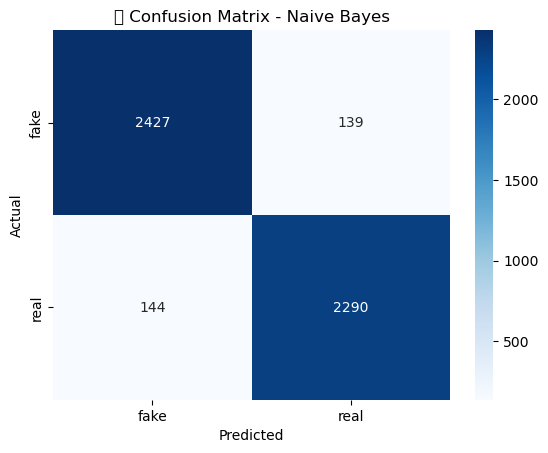

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, nb_preds, labels=nb_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('🔍 Confusion Matrix - Naive Bayes')
plt.show()


/var/folders/zj/lf_s1zw54s16mjdj12y6p0k00000gn/T/ipykernel_3412/3375085795.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


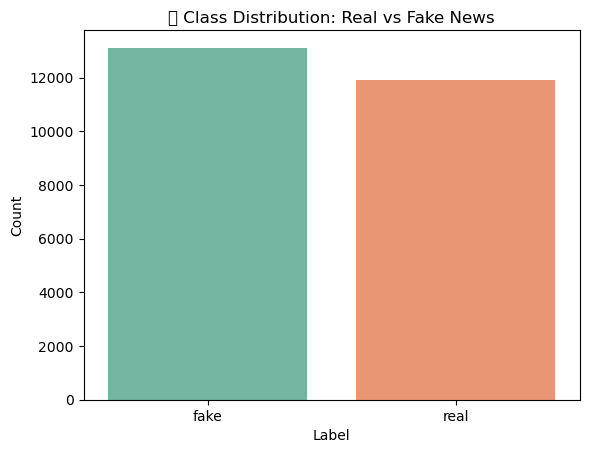

In [25]:
sns.countplot(data=df, x='label', palette='Set2')
plt.title('📊 Class Distribution: Real vs Fake News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
